---> IV-1) : lecture et chargement du fichier dans une table
[['petal_length', 'petal_width', 'species'], ['1.4', '0.2', '0'], ['1.4', '0.2', '0'], ['1.3', '0.2', '0'], ['1.5', '0.2', '0'], ['1.4', '0.2', '0'], ['1.7', '0.4', '0'], ['1.4', '0.3', '0'], ['1.5', '0.2', '0'], ['1.4', '0.2', '0'], ['1.5', '0.1', '0'], ['1.5', '0.2', '0'], ['1.6', '0.2', '0'], ['1.4', '0.1', '0'], ['1.1', '0.1', '0'], ['1.2', '0.2', '0'], ['1.5', '0.4', '0'], ['1.3', '0.4', '0'], ['1.4', '0.3', '0'], ['1.7', '0.3', '0'], ['1.5', '0.3', '0'], ['1.7', '0.2', '0'], ['1.5', '0.4', '0'], ['1.0', '0.2', '0'], ['1.7', '0.5', '0'], ['1.9', '0.2', '0'], ['1.6', '0.2', '0'], ['1.6', '0.4', '0'], ['1.5', '0.2', '0'], ['1.4', '0.2', '0'], ['1.6', '0.2', '0'], ['1.6', '0.2', '0'], ['1.5', '0.4', '0'], ['1.5', '0.1', '0'], ['1.4', '0.2', '0'], ['1.5', '0.1', '0'], ['1.2', '0.2', '0'], ['1.3', '0.2', '0'], ['1.5', '0.1', '0'], ['1.3', '0.2', '0'], ['1.5', '0.2', '0'], ['1.3', '0.3', '0'], ['1.3', '0.3', '0'], ['1.3', '0.2

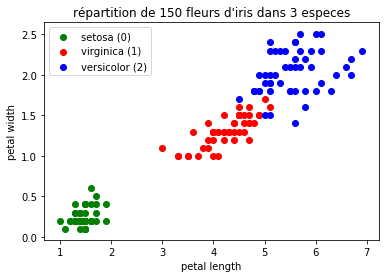

---> V-1) : un exemple pour comprendre 


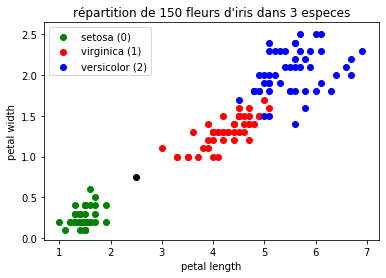

---> V-2) : Recherche des k plus proches voisins 
1.6 0.6 0 
1.9 0.4 0 
1.7 0.5 0 
1.9 0.2 0 
3.0 1.1 1 
1.7 0.4 0 
3.3 1.0 1 
3.3 1.0 1 
1.7 0.3 0 
1.6 0.4 0 
---> V-3) : Détermination de l'espèce  majoritaire 
0


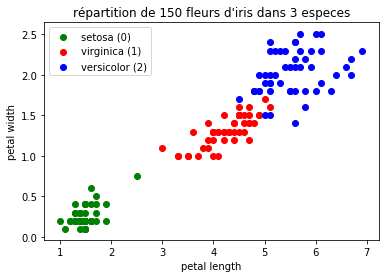

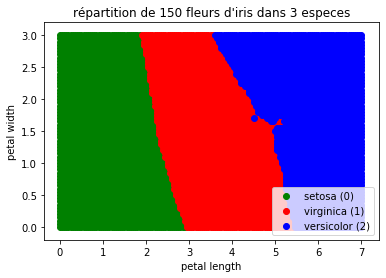

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

""" Partie IV) : réprésentation graphique du jeu de données """

""" Partie IV-1) : Lecture et chargement dans une table """

import csv

def lire_fichier_csv(nom_fichier):
    table = []
    fichier_csv = open("iris.csv", "r", encoding="utf-8")
    lecteur_csv = csv.reader(fichier_csv, delimiter=",")
    for ligne in lecteur_csv:    
        table.append(ligne)
    fichier_csv.close()
    return table

print("---> IV-1) : lecture et chargement du fichier dans une table")
table_iris = lire_fichier_csv("iris.csv")
print(table_iris)

""" Partie IV-2) : Nombre de lignes et colonnes et descripteurs """

print("---> IV-2) : taille de la table")
descripteurs = table_iris.pop(0)
nb_lignes = len(table_iris)
nb_colonnes = len(table_iris[0])
print("nombre de lignes :", nb_lignes)
print("nombre de colonnes :", nb_colonnes)
for i in range(nb_colonnes):
    print("colonne {} : {}".format(i,descripteurs[i]))
    
""" Partie IV-3) : Affichage de la table en colonnes """
    
def affiche_table(table):
    for ligne in table:
        for colonne in ligne :
            print(colonne, end=" ")
        print("")
    
print("---> IV-3) : Affichage de la table en colonnes ")
affiche_table(table_iris)


""" Partie IV-4) : formatage des nombres """

def convertir_table(table):
    for ligne in table :
        ligne[0] = float(ligne[0])
        ligne[1] = float(ligne[1])
        ligne[2] = int(ligne[2])

print("---> IV-4) : formatage des nombres ")
convertir_table(table_iris)
print(table_iris)

""" Partie IV-5) : récupération des colonnes """

def colonne(table, k):
    colonne = []
    for ligne in table :
        colonne.append(ligne[k])
    return colonne

print("---> IV-5) : récupération des colonnes")
length = colonne(table_iris, 0)
width = colonne(table_iris, 1)
lab = colonne(table_iris, 2)
print(length)
print(width)
print(lab)

""" Partie IV-6) : réprésentation graphique des données sous forme
    de nuage de points """

import matplotlib.pyplot as plt

def dessine_graphique(length, width, label):
    x = [length[i] for i in range(len(length)) if label[i] == 0]
    y = [width[i] for i in range(len(width)) if label[i] == 0]
    plt.scatter(x, y, color="green", label="setosa (0)")
    x = [length[i] for i in range(len(length)) if label[i] == 1]
    y = [width[i] for i in range(len(width)) if label[i] == 1]
    plt.scatter(x, y, color="red", label="virginica (1)")
    x = [length[i] for i in range(len(length)) if label[i] == 2]
    y = [width[i] for i in range(len(width)) if label[i] == 2]
    plt.scatter(x, y, color="blue", label="versicolor (2)")
    plt.title("répartition de 150 fleurs d'iris dans 3 especes")
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()
    plt.show()

print("---> IV-6) : Représentation graphique ")
dessine_graphique(length, width, lab)
    
""" Partie V) : recherche des k plus proches voisins sur des points """

""" Partie V-1) : un exemple pour comprendre """

print("---> V-1) : un exemple pour comprendre ") 
plt.scatter(2.5, 0.75, color="black")
dessine_graphique(length, width, lab)

""" Partie V-2) : Recherche des plus proches voisins """

import math
    
def distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)     
    return d

def plus_proches_voisins(E, x, k):
    voisins = []
    for i in range(k):
        voisins.append(E[i])
    for i in range(k, len(E)):
        d = distance(x, E[i][0:2])
        u = i
        for j in range(k):
            if distance(voisins[j][0:2], x) > d:
                u = j
                d = distance(voisins[j][0:2], x)
        if u != i:
            voisins[u] = E[i]
    return voisins

print("---> V-2) : Recherche des k plus proches voisins ")
x,y = 2.5, 0.75
voisins = plus_proches_voisins(table_iris, [x, y], 10)
affiche_table(voisins)

""" Partie V-3) : Détermination de l'espèce majoritaire parmi les plus 
    proches voisins"""
    
def label_majoritaire(table):
    nb_labels = [0, 0, 0]
    for ligne in table :
        if ligne[2] == 0 :
            nb_labels[0] +=1
        elif ligne[2] == 1 :
            nb_labels[1] += 1
        else :
            nb_labels[2] += 1
    #print(nb_labels)
    max_label = nb_labels.index(max(nb_labels))
    return max_label

print("---> V-3) : Détermination de l'espèce  majoritaire ")
max_label = label_majoritaire(voisins)
print(max_label)
table_iris.append([x, y, max_label])    
length.append(x)
width.append(y)
lab.append(max_label)
dessine_graphique(length, width, lab)

""" Partie V-4) : Détermination de l'espèce majoritaire pour chaque point du 
    plan """
    
pas = 0.05
x = 0
while x < 7 :
    y = 0
    while y < 3 :
        voisins = plus_proches_voisins(table_iris, [x, y], 3)
        max_label = label_majoritaire(voisins)        
        #table_iris.append([x, y, max_label])
        length.append(x)
        width.append(y)
        lab.append(max_label)
        y += pas
    x += pas
dessine_graphique(length, width, lab)
 